## Data from stackexchange.com

The CSV used in the analysis was generated using the following SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<font size="1"><code>

select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code></font>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Exploration

In [3]:
df = pd.read_csv("./data/stackexchange_query_results.csv")
df.shape

(1991, 3)

In [4]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [5]:
df.tail()

,m,TagName,Unnamed: 2
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [32]:
df.columns = ['Date', 'Language', 'Posts']
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Language,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


### Check for missing values and duplicates

In [14]:
df.isna().sum()

Date        0
Language    0
Posts       0
dtype: int64

In [16]:
df.loc[df.duplicated()]

,Date,Language,Posts


Finding which language has the most posts, sorted in descending order.

In [20]:
df[['Language','Posts']].groupby('Language').sum().sort_values('Posts',ascending=False)

,Posts
Language,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [35]:
# since each language has one entry for each month, we can just count the # of entries
# and that is # of months the language has been on stackexchange

df.groupby('Language').count()


,Date,Posts
Language,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


### Data Manipulation with Pivot table

In [37]:
df_pivot = df.pivot(index="Date", columns="Language", values= "Posts")
df_pivot

Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


### Fill NaN values with Zeros

In [38]:
df_pivot.fillna(0, inplace=True)
df_pivot

Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [39]:
# ensure no NaNs remain
df_pivot.isna().values.any() # is false if no NaN values

False

### Data Visualisaton with with Matplotlib


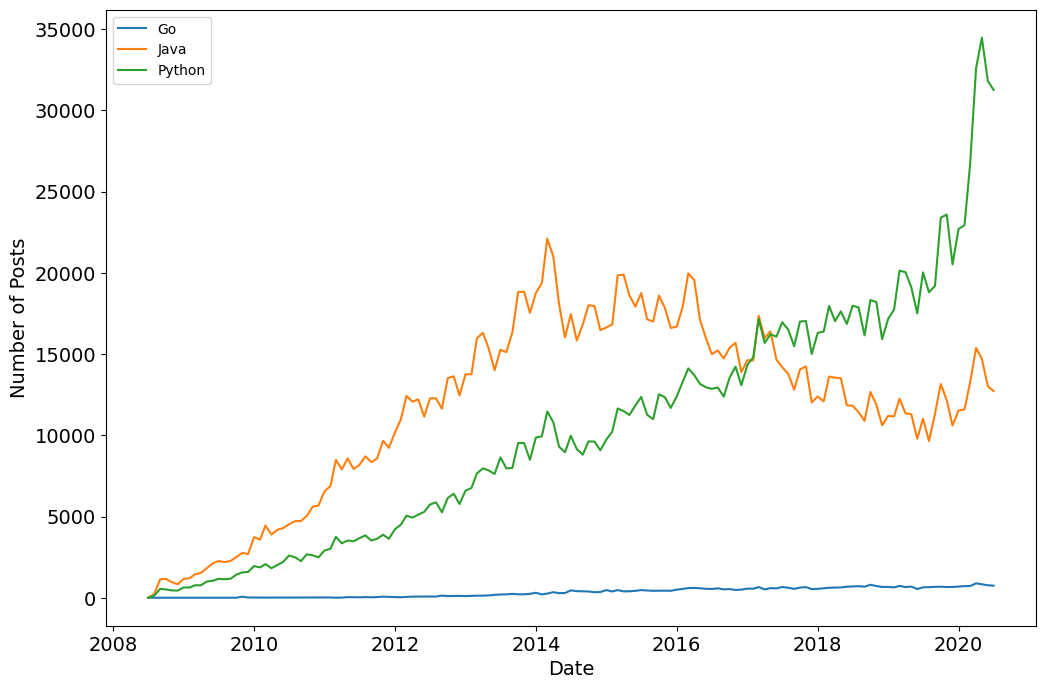

In [56]:
plt.figure(figsize=(12,8)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.plot(df_pivot.index, df_pivot.go) # df_pivot.go is same as df_pivot['go']
plt.plot(df_pivot.index, df_pivot.java)
plt.plot(df_pivot.index, df_pivot.python)
plt.legend(['Go', 'Java', 'Python'])
plt.show()

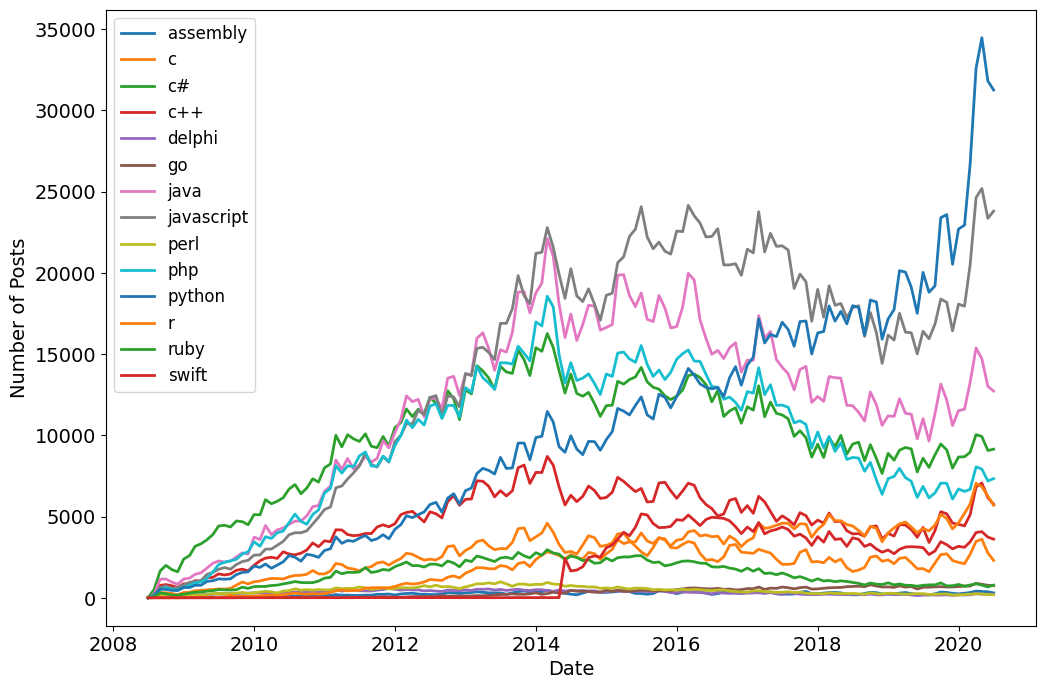

In [57]:
plt.figure(figsize=(12,8)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
for col in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[col], linewidth=2, label=df_pivot[col].name) # df_pivot.go is same as df_pivot['go']

plt.legend(fontsize=12)
plt.show()

### Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. 

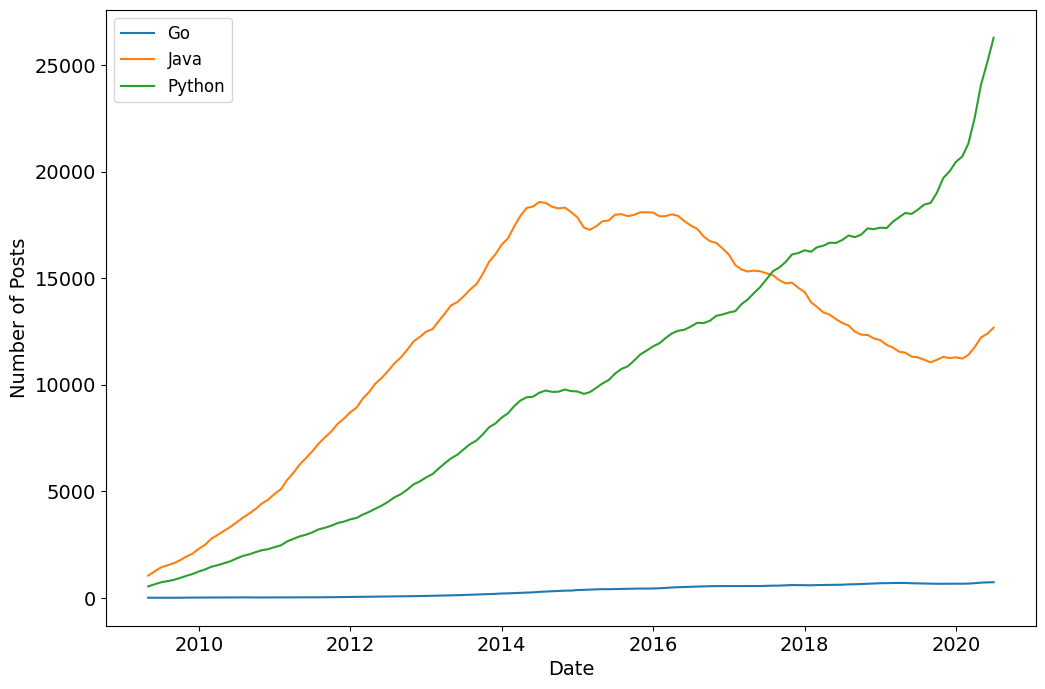

In [63]:
df_smooth = df_pivot.rolling(window=11).mean()
plt.figure(figsize=(12,8)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.plot(df_smooth.index, df_smooth.go, label='Go') # df_pivot.go is same as df_pivot['go']
plt.plot(df_smooth.index, df_smooth.java, label='Java')
plt.plot(df_smooth.index, df_smooth.python, label='Python')
plt.legend(fontsize=12)
plt.show()